# Kenya Exploratory Data Analysis

### Import resources

In [ ]:
# import resources

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot  as plt
import geopandas as gpd
import shapely as sh

### Make a Kenya filter using the county map

In [114]:
# this function means I can reuse the kenya filter on multiple datasets.

def kenya_filter (gdf, kenya_boundary):
    if gdf.crs != kenya_boundary.crs:
        gdf = gdf.to_crs(kenya_boundary.crs)
    return gpd.clip(gdf, kenya_boundary)    # .clip keeps only the points inside the kenya boundary

### Create the Kenya County map to be reused as the default background

In [115]:
ke_counties = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\open_africa\kenyan-counties\County.shp")

ke_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    47 non-null     int32   
 1   AREA        47 non-null     float64 
 2   PERIMETER   47 non-null     float64 
 3   COUNTY3_    47 non-null     float64 
 4   COUNTY3_ID  47 non-null     float64 
 5   COUNTY      47 non-null     object  
 6   Shape_Leng  47 non-null     float64 
 7   Shape_Area  47 non-null     float64 
 8   geometry    47 non-null     geometry
dtypes: float64(6), geometry(1), int32(1), object(1)
memory usage: 3.2+ KB


In [116]:
ke_counties.head()

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.9786, 4..."
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."


In [117]:
ke_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

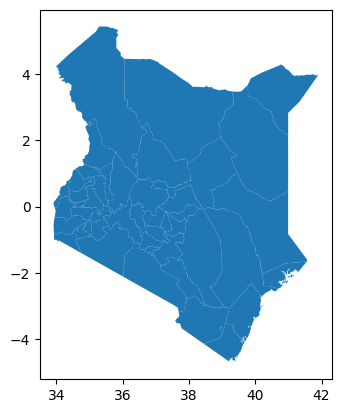

In [118]:
ke_counties.plot()

## Major towns

In [129]:
ke_major_towns = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\wri\ke_major-towns\ke_major-towns.shp")

ke_major_towns.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   TOWN_NAME  56 non-null     object  
 1   geometry   56 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.0+ KB


d:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\.venv\Lib\site-packages\geopandas\plotting.py:662: RuntimeWarning: overflow encountered in scalar multiply
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))
d:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\.venv\Lib\site-packages\geopandas\plotting.py:662: RuntimeWarning: invalid value encountered in cos
  ax.set_aspect(1 / np.cos(y_coord * np.pi / 180))


ValueError: aspect must be finite and positive 

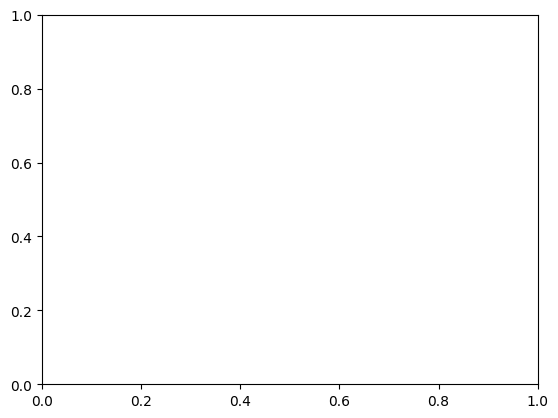

In [130]:
ke_major_towns.plot()

In [131]:
print(ke_major_towns.geometry.y.min(), ke_major_towns.geometry.y.max())

-1.7976931348623157e+308 4.265939235687256


In [132]:
ke_major_towns.geometry.y.sort_values().head()

54   -1.797693e+308
43    -4.168557e+00
44    -4.057344e+00
45    -3.629929e+00
42    -3.397617e+00
dtype: float64

In [133]:
ke_major_towns[50:]

,TOWN_NAME,geometry
50,Garissa,POINT (39.65064 -0.45713)
51,Wote,POINT (37.62535 -1.79834)
52,Usenge,POINT (34.07015 -0.06221)
53,Muranga,POINT (37.15913 -0.71649)
54,Karatina,POINT (-1.79769e+308 -1.79769e+308)
55,Karatina,POINT (37.13847 -0.48487)


In [134]:
ke_major_towns.drop(ke_major_towns.index[54], inplace=True)

In [137]:
ke_major_towns[50:]

,TOWN_NAME,geometry
50,Garissa,POINT (39.65064 -0.45713)
51,Wote,POINT (37.62535 -1.79834)
52,Usenge,POINT (34.07015 -0.06221)
53,Muranga,POINT (37.15913 -0.71649)
55,Karatina,POINT (37.13847 -0.48487)


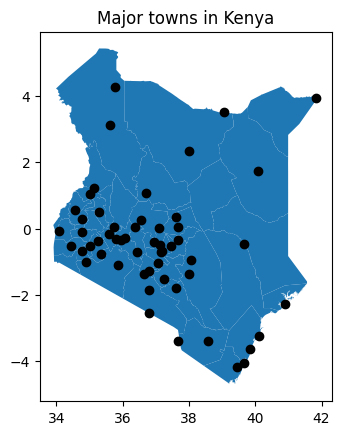

In [146]:
ke_major_towns.plot(ax=ke_counties.plot(),
                    color='black')

plt.title('Major towns in Kenya')

plt.show()

## City points

In [147]:
city_points = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\City points\Cities.shp")

city_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2539 non-null   int64   
 1   CITY_NAME   2539 non-null   object  
 2   GMI_ADMIN   2539 non-null   object  
 3   ADMIN_NAME  2539 non-null   object  
 4   FIPS_CNTRY  2539 non-null   object  
 5   CNTRY_NAME  2539 non-null   object  
 6   STATUS      2539 non-null   object  
 7   POP_RANK    2539 non-null   int64   
 8   POP_CLASS   2539 non-null   object  
 9   PORT_ID     2539 non-null   int64   
 10  LABEL_FLAG  2539 non-null   int64   
 11  geometry    2539 non-null   geometry
dtypes: geometry(1), int64(4), object(7)
memory usage: 238.2+ KB


<Axes: >

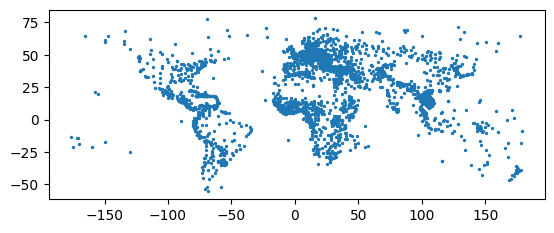

In [148]:
city_points.plot(markersize = 2)

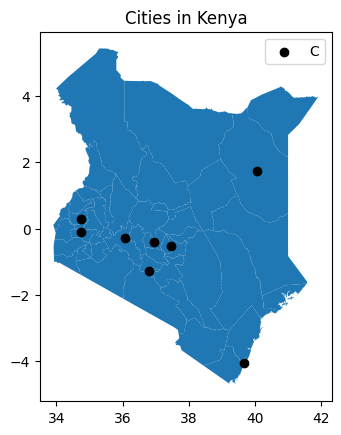

In [ ]:
ke_city_points = kenya_filter(city_points, ke_counties)

ke_city_points.plot(color='black',
                    ax=ke_counties.plot())
plt.title('Cities in Kenya')
plt.show()

## Lakes

In [163]:
world_lakes = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\Lakes_ne_v4_1_0\ne_10m_lakes.shp")

world_lakes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   featurecla  1354 non-null   object  
 1   scalerank   1354 non-null   int64   
 2   name        744 non-null    object  
 3   name_abb    743 non-null    object  
 4   name_alt    194 non-null    object  
 5   note        612 non-null    object  
 6   delta       20 non-null     object  
 7   dam_name    117 non-null    object  
 8   year        1354 non-null   int32   
 9   admin       53 non-null     object  
 10  min_zoom    1354 non-null   float64 
 11  min_label   1354 non-null   float64 
 12  label       607 non-null    object  
 13  wikidataid  616 non-null    object  
 14  name_ar     108 non-null    object  
 15  name_bn     19 non-null     object  
 16  name_de     420 non-null    object  
 17  name_en     551 non-null    object  
 18  name_es     342 non-null    object  
 19

<Axes: >

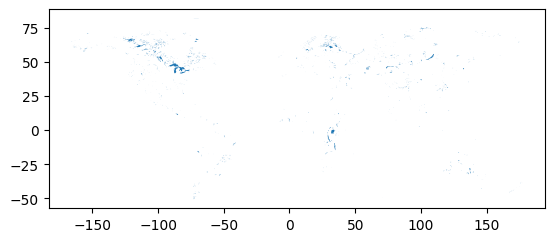

In [164]:
world_lakes.plot()

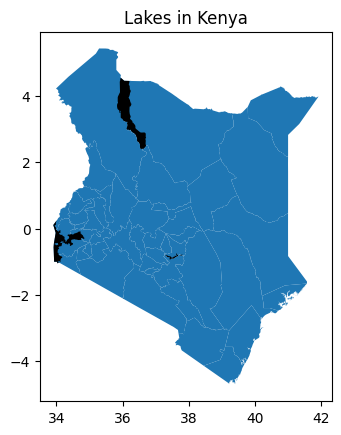

In [165]:
ke_lakes = kenya_filter(world_lakes, ke_counties)

ke_lakes.plot(color='black',
                    ax=ke_counties.plot())
plt.title('Lakes in Kenya')
plt.show()

## Rivers

In [166]:
world_major_rivers = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\Rivers\Major_Rivers_w_Names.shp")

world_major_rivers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1399 non-null   int64   
 1   DISSOLVE    1399 non-null   object  
 2   SCALERANK   1399 non-null   float64 
 3   FEATURECLA  1399 non-null   object  
 4   NAME        1304 non-null   object  
 5   NAME_ALT    4 non-null      object  
 6   RIVERNUM    1399 non-null   float64 
 7   NOTE        33 non-null     object  
 8   Shape_Leng  1399 non-null   float64 
 9   geometry    1399 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 109.4+ KB


<Axes: >

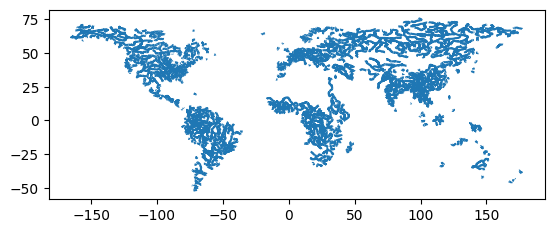

In [167]:
world_major_rivers.plot()

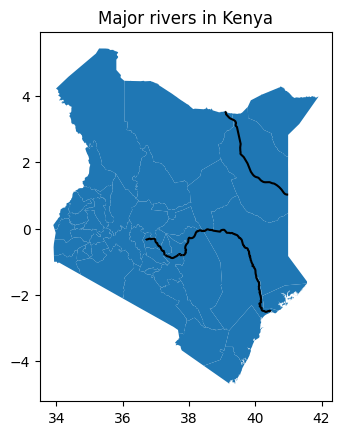

In [168]:
ke_major_rivers = kenya_filter(world_major_rivers, ke_counties)

ke_major_rivers.plot(color='black',
                    ax=ke_counties.plot())
plt.title('Major rivers in Kenya')
plt.show()

In [169]:
world_3mline_rivers = gpd.read_file(r"D:\2-zindua\03-python-data-analysis\zindua-python-data-analysis\wk5_pydata_prj\data_deficient_iucn_species\data_deficient_iucn_species\data\raw\iucn\Rivers\rivers_3mline.shp")

world_3mline_rivers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34111 entries, 0 to 34110
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  34111 non-null  int64   
 1   OBJECTID    34111 non-null  float64 
 2   FNODE_      34111 non-null  float64 
 3   TNODE_      34111 non-null  float64 
 4   LPOLY_      34111 non-null  float64 
 5   RPOLY_      34111 non-null  float64 
 6   LENGTH      34111 non-null  float64 
 7   RIV3M_      34111 non-null  float64 
 8   RIV3M_ID    34111 non-null  float64 
 9   TYPE        34111 non-null  int64   
 10  RIVER_TYPE  34111 non-null  object  
 11  RIVER_RANK  34111 non-null  int64   
 12  RIV_COINC   34111 non-null  int64   
 13  COUNTRY1    34111 non-null  object  
 14  COUNTRY2    2141 non-null   object  
 15  CNTRY_NAME  34111 non-null  object  
 16  REGION      34110 non-null  object  
 17  CONTINENT   34110 non-null  object  
 18  Shape_Leng  34111 non-null  float64 
 

<Axes: >

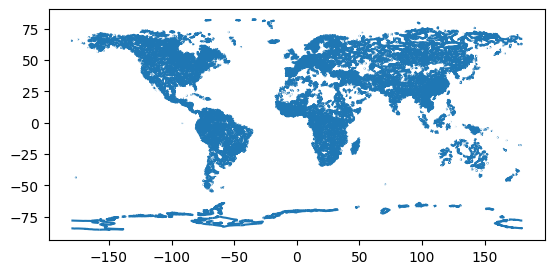

In [170]:
world_3mline_rivers.plot()

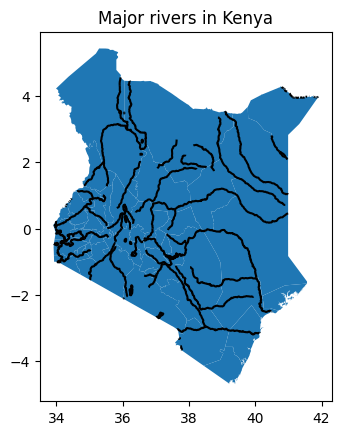

In [ ]:
ke_3mline_rivers = kenya_filter(world_3mline_rivers, ke_counties)

ke_3mline_rivers.plot(color='black',
                    ax=ke_counties.plot())
plt.title('Rivers in Kenya')
plt.show()

In [ ]:
plt.plot(ke_counties.geometry.boundary, color='black')
plt.title('Kenya boundaries')
plt.show()
